In [143]:
import TMQGP as tm
from numpy import *
import os
import h5py

In [144]:
import matplotlib
matplotlib.style.use(
    'publication'
)

In [174]:
mu_frac = 0.5

In [175]:
folder = 'noscreen_trange_mu=%.2f_2/'%mu_frac

In [176]:
Trange = linspace(0.15, 0.55, 21)

In [177]:
dfs = [h5py.File(os.path.join(folder, 'data_T=%.3f.hdf5'%T), 'r') for T in Trange]

(0.0, 1.5)

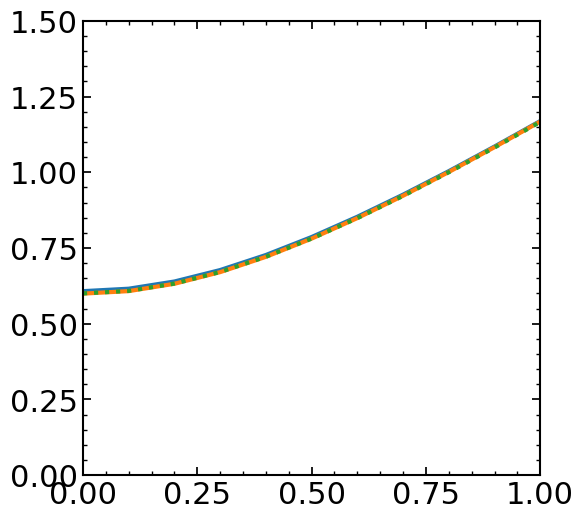

In [178]:
df = dfs[0]

df['Eps']['Q']

plt.plot(qrange, array(df['Eps']['Q']))
plt.plot(qrange, array(df['Eps']['A']))
plt.plot(qrange, sqrt(mQ**2 + qrange**2), ls=':')
plt.xlim(0, 1)
plt.ylim(0, 1.5)

In [179]:
mQ = 0.6

In [180]:
from scipy.integrate import quad

In [181]:
def Pfree(T, mu):
    res = quad(lambda z: z**2 / 2/pi**2 * T * log(1 + exp(-(sqrt(mQ**2 + z**2) - mu)/T)), 0, 5)[0]
    res += quad(lambda z: z**2 / 2/pi**2 * T * log(1 + exp(-(sqrt(mQ**2 + z**2) + mu)/T)), 0, 5)[0]
    return res

In [182]:
ps_Q_qp = []
ps_Q_s = []

ps_A_qp = []
ps_A_s = []

for T, df in zip(Trange, dfs):
    qrange = df.attrs['qrange']
    re_K = array(real(df['S']['Q']))
    eps = array(df['Eps']['Q'])
    iEps = tm.Interpolator(qrange, eps, 'cubic')
    iRe = tm.Interpolator(qrange, re_K, 'cubic')
    ps_Q_qp += [tm.P_Q_QP(T, mu_frac * T, iEps)]
    ps_Q_s += [tm.P_S_QP(T, mu_frac * T, iEps, iRe)]

    re_K = array(real(df['S']['A']))
    eps = array(df['Eps']['A'])
    iEps = tm.Interpolator(qrange, eps, 'cubic')
    iRe = tm.Interpolator(qrange, re_K, 'cubic')
    ps_A_qp += [tm.P_Q_QP(T, -mu_frac * T, iEps)]
    ps_A_s += [tm.P_S_QP(T, -mu_frac * T, iEps, iRe)]

ps_Q_qp = array(ps_Q_qp)
ps_Q_s = array(ps_Q_s)

ps_A_qp = array(ps_A_qp)
ps_A_s = array(ps_A_s)


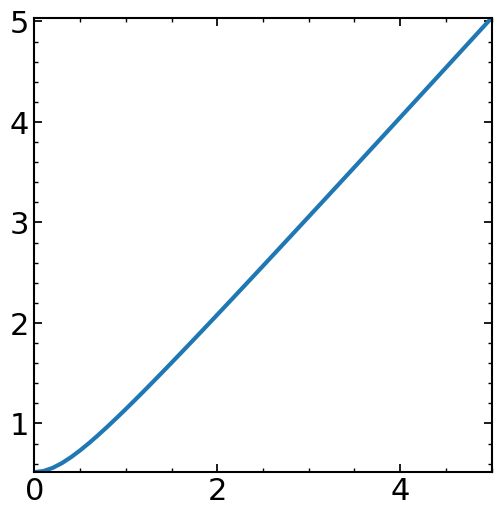

In [183]:
plt.plot(qrange, [iEps(q) for q in qrange])

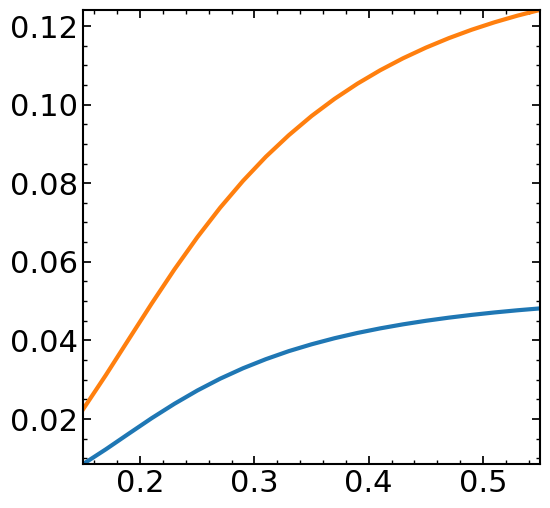

In [184]:
plt.plot(Trange, ps_A_qp/Trange**4)
plt.plot(Trange, ps_Q_qp/Trange**4)

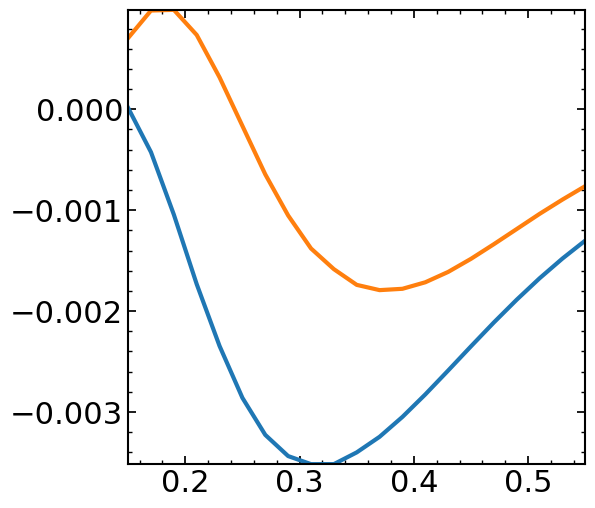

In [185]:
plt.plot(Trange, ps_A_s/Trange**4)
plt.plot(Trange, ps_Q_s/Trange**4)

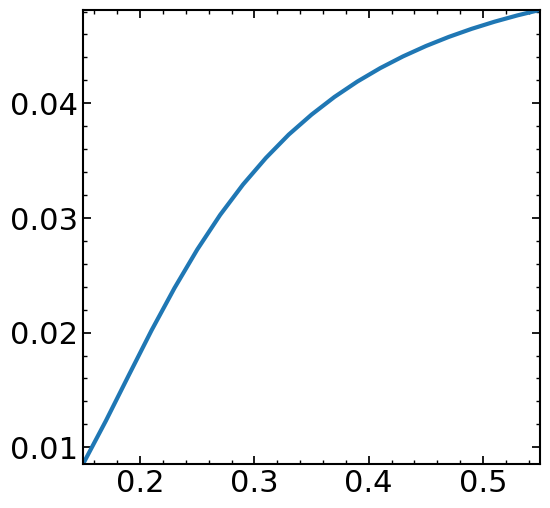

In [186]:
plt.plot(Trange, ps_A_qp/Trange**4)

In [187]:
Nf = 3
Nc = 3
Ns = 2
Na = 2

In [188]:
p_free = Nf*Nc*Ns*array([Pfree(T, mu_frac*T) for T in Trange])

In [189]:
p_free_0 = Nf*Nc*Ns*array([Pfree(T, 0*T) for T in Trange])

In [190]:
ps_qp = Nf*Nc*Ns * (ps_Q_qp + ps_A_qp)
ps_s = Nf*Nc*Ns * (ps_Q_s + ps_A_s)

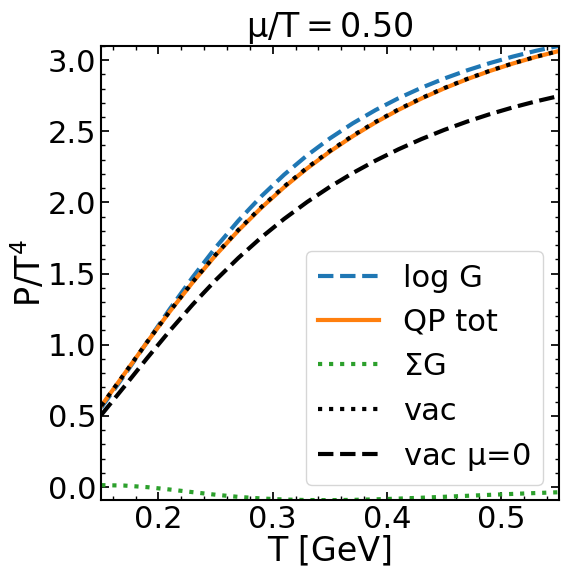

In [191]:
plt.plot(Trange, ps_qp/Trange**4, ls='--', label='log G')
plt.plot(Trange, (ps_qp + ps_s)/Trange**4, label='QP tot')
plt.plot(Trange, ps_s/Trange**4, ls=':', label=r'$\Sigma G$')

plt.plot(Trange, p_free/Trange**4, ls=':', c='black', label='vac')
plt.plot(Trange, p_free_0/Trange**4, ls='--', c='black', label='vac $\mu$=0')

plt.xlabel('T [GeV]')
plt.ylabel(r'$P/T^4$')
plt.legend()

plt.title(r'$\mu/T = %.2f$'%mu_frac)

plt.savefig('PT_QP_nosub_mu=%.2f.pdf'%mu_frac, bbox_inches='tight')

## Compare spectra

(0.0, 1.5)

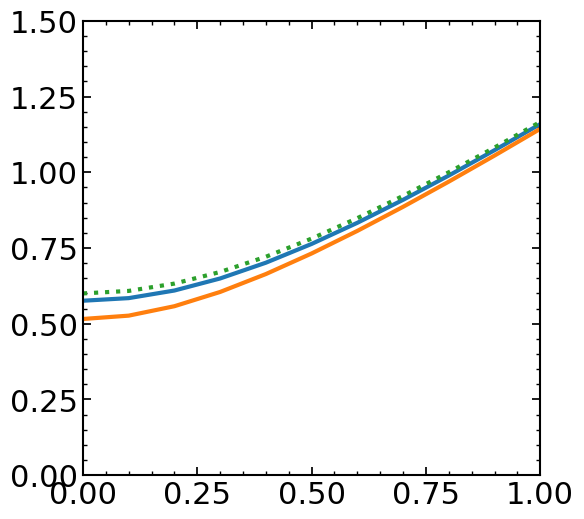

In [194]:
df = dfs[-1]

df['Eps']['Q']

plt.plot(qrange, array(df['Eps']['Q']))
plt.plot(qrange, array(df['Eps']['A']))
plt.plot(qrange, sqrt(mQ**2 + qrange**2), ls=':')
plt.xlim(0, 1)
plt.ylim(0, 1.5)

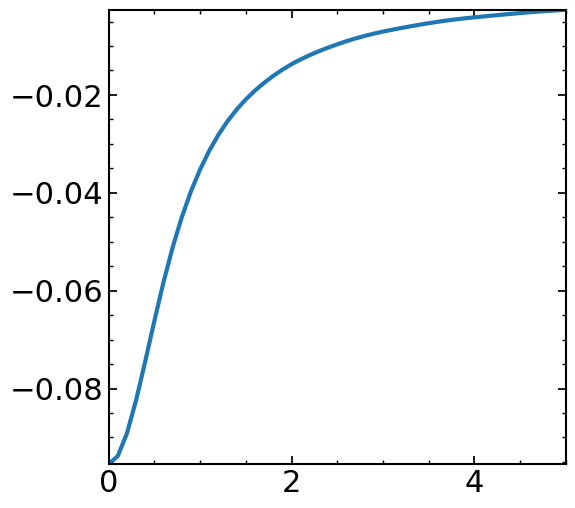

In [195]:
plt.plot(qrange, imag(array(df['S']['Q'])))
# plt.plot(qrange, real(array(df['S']['A'])), ls=':')

## Plot resulting $T$-matrices

In [86]:
erange = linspace(-5, 5, 201)

In [87]:
df = dfs[0]

In [88]:
df['TM/qa1']

<HDF5 group "/TM/qa1" (2 members)>

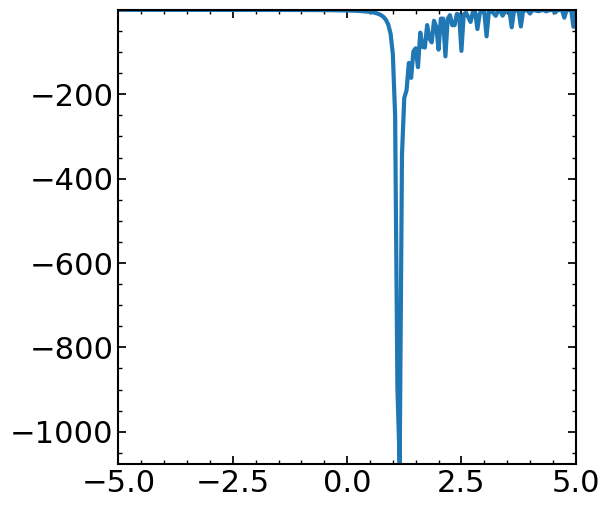

In [89]:
plt.plot(erange, imag(df['TM/qa1/0'][:, 0]))

## Calculating $\Phi$